<a href="https://colab.research.google.com/github/Shamma-Samiha/Stress-Level-Prediction-using-Classification/blob/main/Stress_Level_Prediction_Project_(Classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Stress Level Prediction using Classification**Mental Health.avif


# **1. Setup**

In [4]:
!pip -q install seaborn scikit-learn matplotlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


# **2. Load Dataset**

In [8]:
#@title 2) Load Dataset
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/StressLevelDataset.csv")
print("Shape:", df.shape)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Shape: (1100, 21)


,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


# **3. Basic Cleaning**

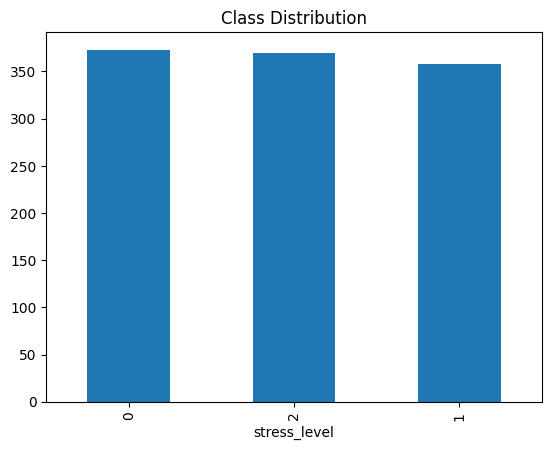

In [9]:
# Stress level is categorical target
df["stress_level"].value_counts().plot(kind="bar", title="Class Distribution")
plt.show()

X = df.drop("stress_level", axis=1)
y = df["stress_level"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale features for LR/GB
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# **4. Exploratory Data Analysis (EDA)**

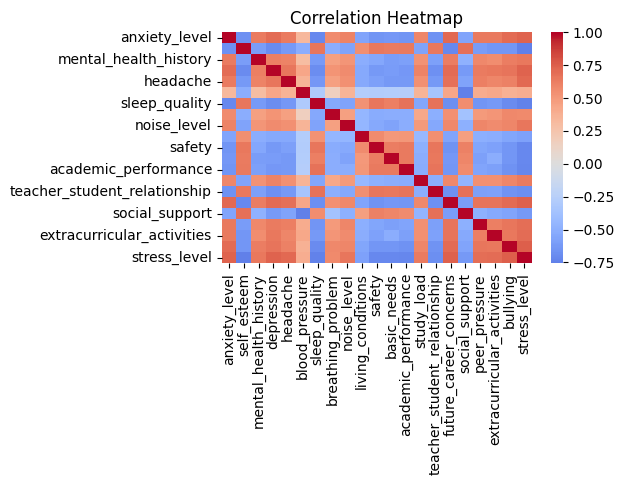

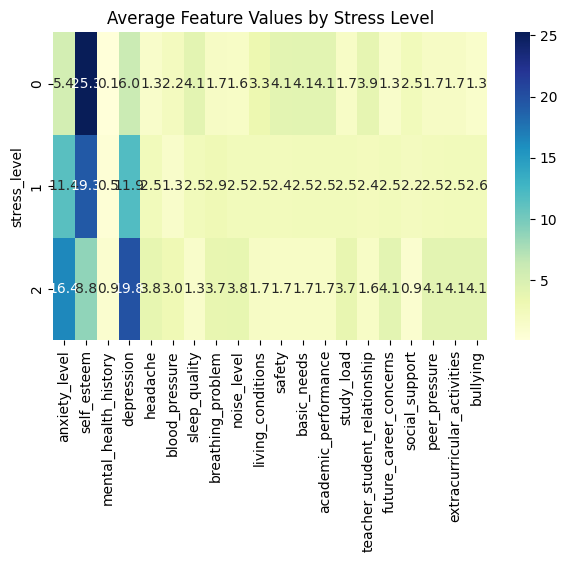

In [17]:
plt.figure(figsize=(5,3))
sns.heatmap(df.corr(), cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()

# Compare mean values across stress levels
group_means = df.groupby("stress_level").mean()
plt.figure(figsize=(7,4))
sns.heatmap(group_means, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Average Feature Values by Stress Level")
plt.show()


# **5. Modeling - Logistic Regression**

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.85      0.86        74
           1       0.90      0.92      0.91        72
           2       0.88      0.88      0.88        74

    accuracy                           0.88       220
   macro avg       0.88      0.88      0.88       220
weighted avg       0.88      0.88      0.88       220



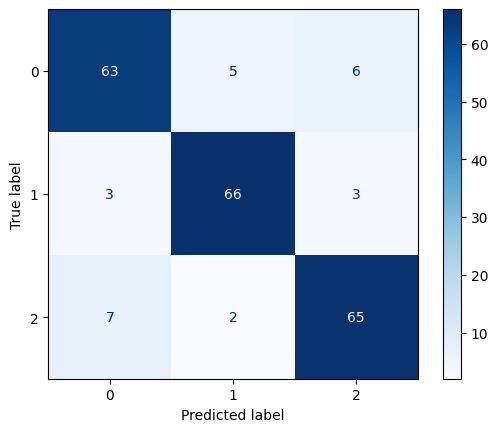

In [11]:
lr = LogisticRegression(max_iter=200, multi_class="multinomial")
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_lr)).plot(cmap="Blues")
plt.show()


# **6. Modeling - Random Forest**

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.84      0.87        74
           1       0.89      0.93      0.91        72
           2       0.86      0.89      0.87        74

    accuracy                           0.89       220
   macro avg       0.89      0.89      0.89       220
weighted avg       0.89      0.89      0.89       220



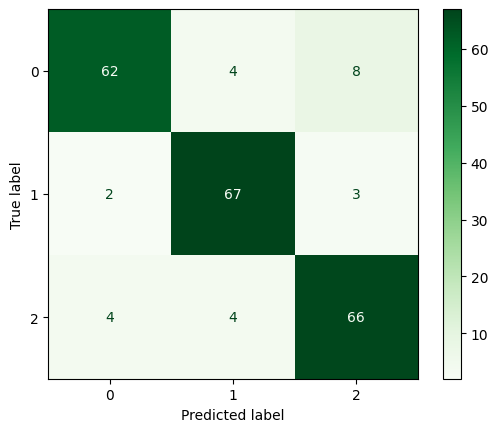

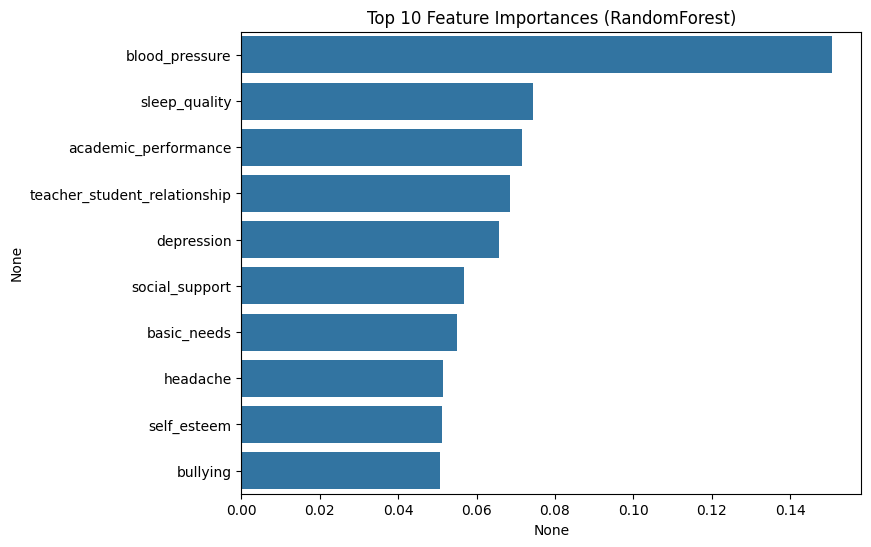

In [12]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_rf)).plot(cmap="Greens")
plt.show()

# Feature importance
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(8,6))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Feature Importances (RandomForest)")
plt.show()


# **7. Modeling - Gradient Boosting**

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.82      0.85        74
           1       0.87      0.93      0.90        72
           2       0.86      0.86      0.86        74

    accuracy                           0.87       220
   macro avg       0.87      0.87      0.87       220
weighted avg       0.87      0.87      0.87       220



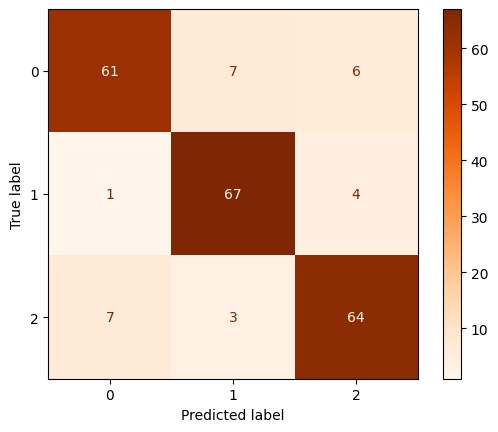

In [13]:
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train_scaled, y_train)
y_pred_gb = gb.predict(X_test_scaled)

print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_gb)).plot(cmap="Oranges")
plt.show()


# **8. Cross-Validation Scores**

In [14]:
for model, name in [(lr,"LogReg"), (rf,"RandomForest"), (gb,"GradBoost")]:
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring="accuracy")
    print(f"{name} CV Accuracy: {scores.mean():.3f} ± {scores.std():.3f}")


LogReg CV Accuracy: 0.877 ± 0.035
RandomForest CV Accuracy: 0.874 ± 0.023
GradBoost CV Accuracy: 0.886 ± 0.024


# **9. Saving Model**

In [15]:
from joblib import dump
dump(rf, "stress_rf_model.joblib")
df.to_csv("stress_cleaned.csv", index=False)
print("Saved RandomForest model + cleaned dataset")


Saved RandomForest model + cleaned dataset
